<a href="https://colab.research.google.com/github/peterbabulik/synthetic/blob/main/Langlands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install cirq --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

Using device: cuda
Initializing Quantum Langlands Analyzer...
Generating Langlands fractal visualization with 300 points...


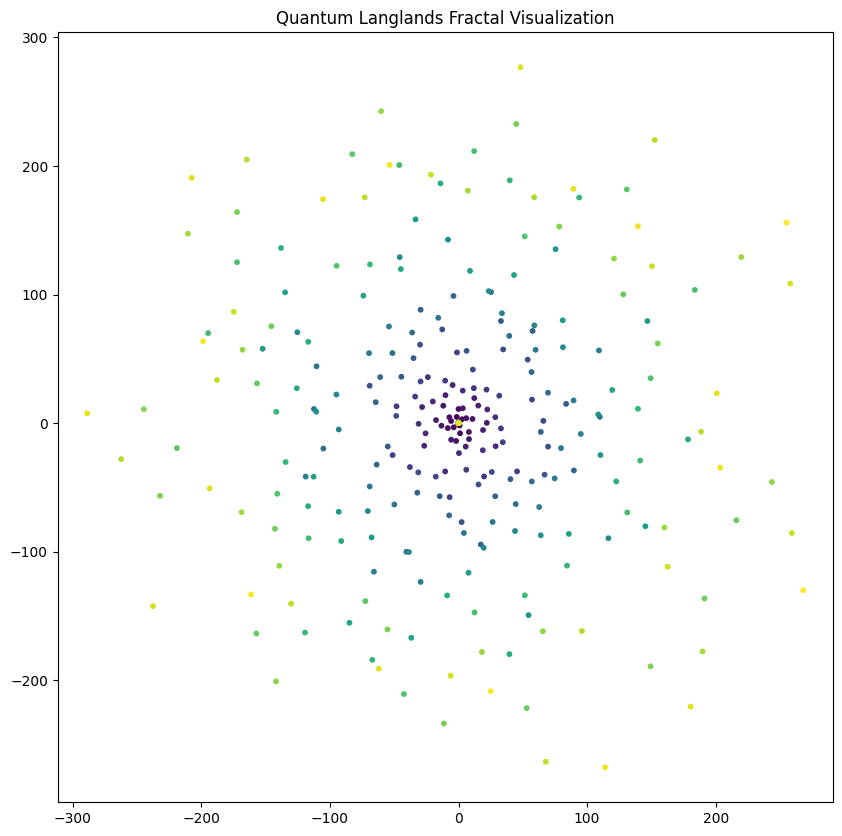

Training quantum model...
Epoch 0/1000, Loss: 2.0000
Epoch 100/1000, Loss: 0.0828
Epoch 200/1000, Loss: 1.4651
Epoch 300/1000, Loss: 1.0423
Epoch 400/1000, Loss: 0.3817
Epoch 500/1000, Loss: 0.2339
Epoch 600/1000, Loss: 1.8497
Epoch 700/1000, Loss: 1.0918
Epoch 800/1000, Loss: 1.8225
Epoch 900/1000, Loss: 1.5875


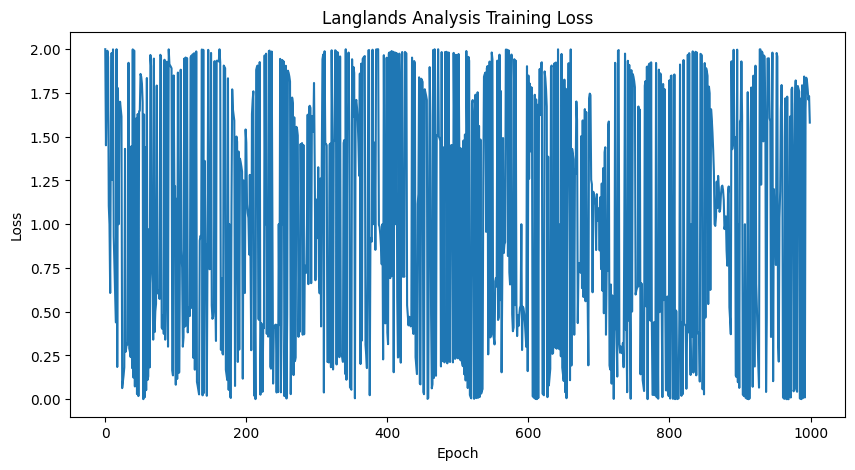

In [4]:

# Install required packages
# !pip install cirq numpy matplotlib torch

import cirq
import numpy as np
import matplotlib.pyplot as plt
import torch
from collections import defaultdict
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class QuantumLanglandsAnalyzer:
    def __init__(self, num_qubits=4):
        self.num_qubits = num_qubits
        self.qubits = cirq.LineQubit.range(num_qubits)
        self.noise_model = cirq.depolarize(p=0.01)

        # Initialize trainable parameters for quantum representations
        self.theta = torch.nn.Parameter(torch.randn(num_qubits, device=device))
        self.quantum_scale = torch.nn.Parameter(torch.tensor([1.0], device=device))

        # Parameters specific to Langlands program analysis
        self.automorphic_dim = 2  # Dimension of automorphic forms space
        self.galois_group_order = 4  # Order of the Galois group

        self.optimizer = torch.optim.Adam([self.theta, self.quantum_scale], lr=0.01)

    def _create_langlands_circuit(self, input_data):
        circuit = cirq.Circuit()

        # Encode input data representing automorphic forms
        binary_data = format(input_data, f'0{self.num_qubits}b')
        for i, bit in enumerate(binary_data):
            if i < self.num_qubits and bit == '1':
                circuit.append(cirq.X(self.qubits[i]))

        # Add parameterized gates for quantum Langlands correspondence
        for i, qubit in enumerate(self.qubits):
            circuit.append([
                cirq.H(qubit),
                cirq.ry(self.theta[i].item())(qubit)
            ])

        # Add entangling gates to represent Galois group actions
        for i in range(0, self.num_qubits - 1, 2):
            circuit.append(cirq.CNOT(self.qubits[i], self.qubits[i + 1]))

        # Add measurement
        for i, qubit in enumerate(self.qubits):
            circuit.append(cirq.measure(qubit, key=f'q{i}'))

        return circuit

    def encode_automorphic_form(self, data):
        data_int = int(data) if isinstance(data, (bytes, bytearray)) else data
        circuit = self._create_langlands_circuit(data_int)

        noisy_circuit = circuit.with_noise(self.noise_model)
        simulator = cirq.Simulator()
        result = simulator.run(noisy_circuit)

        # Convert measurement results to quantum representation of automorphic forms
        measurements = np.array([result.measurements[f'q{i}'][0] for i in range(self.num_qubits)])
        quantum_state = torch.tensor(measurements, device=device, dtype=torch.float32)

        return self.quantum_scale * quantum_state

    def analyze_langlands_correspondence(self, quantum_state):
        # Simulate analysis of Langlands correspondence
        # This is a simplified representation - actual analysis would be more complex
        galois_rep = torch.sum(quantum_state * torch.pow(2, torch.arange(self.num_qubits, device=device)))

        # Map to automorphic form space
        automorphic_form = torch.sin(galois_rep * np.pi / self.galois_group_order)

        return automorphic_form

    def forward(self, data_point):
        if isinstance(data_point, (bytes, bytearray)):
            data_point = int.from_bytes(data_point, byteorder='big')

        quantum_state = self.encode_automorphic_form(data_point)
        langlands_analysis = self.analyze_langlands_correspondence(quantum_state)
        return langlands_analysis

    def train_step(self, data_point):
        self.optimizer.zero_grad()

        if isinstance(data_point, (bytes, bytearray)):
            data_point = int.from_bytes(data_point, byteorder='big')

        # Forward pass
        output = self.forward(data_point)

        # Compute loss - in this case, we're looking for specific patterns in the output
        target = torch.tensor(np.sin(data_point * np.pi / self.galois_group_order), device=device)
        loss = torch.abs(output - target)

        # Backward pass
        loss.backward()
        self.optimizer.step()

        return loss.item()

class LanglandsFractalVisualizer:
    def __init__(self, quantum_analyzer):
        self.quantum_analyzer = quantum_analyzer
        self.points = []

    def generate(self, iterations):
        self.points = []
        for i in range(iterations):
            # Generate points based on automorphic forms
            quantum_state = self.quantum_analyzer.encode_automorphic_form(i)
            analysis = self.quantum_analyzer.analyze_langlands_correspondence(quantum_state)

            # Use the analysis to generate fractal points
            x = np.cos(i) * i * analysis.item()
            y = np.sin(i) * i * analysis.item()
            self.points.append((x, y))

def plot_langlands_fractal(points):
    plt.figure(figsize=(10, 10))
    x_coords, y_coords = zip(*points)
    plt.scatter(x_coords, y_coords, c=range(len(points)), cmap='viridis', s=10)
    plt.title("Quantum Langlands Fractal Visualization")
    plt.axis('equal')
    plt.show()

def main():
    print("Initializing Quantum Langlands Analyzer...")
    quantum_analyzer = QuantumLanglandsAnalyzer()
    fractal_visualizer = LanglandsFractalVisualizer(quantum_analyzer)

    iterations = 300
    print(f"Generating Langlands fractal visualization with {iterations} points...")
    fractal_visualizer.generate(iterations)

    plot_langlands_fractal(fractal_visualizer.points)

    print("Training quantum model...")
    losses = []
    num_epochs = 1000
    test_data = 42  # Some test input representing an automorphic form

    for epoch in range(num_epochs):
        loss = quantum_analyzer.train_step(test_data)
        losses.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{num_epochs}, Loss: {loss:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.title("Langlands Analysis Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

if __name__ == "__main__":
    main()